# Data Importing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("D:\Study\Practice\DA Portfolio Project\Vantage Circle\Final.xlsx")

In [3]:
df

,Sender_ID,Company_Names,Receiver_ID,Country,Points,Date,Month,Week_Num,Feed_Type,Manager_ID
0,1448843,E,1449672,India,5000,2022-10-17,10,43,Award,1448843
1,1448843,E,1452428,United Kingdom,18000,2022-10-17,10,43,Award,1448843
2,1448843,E,1441662,Singapore,40000,2022-10-17,10,43,Award,1448843
3,1440855,E,1440851,India,15000,2022-12-22,12,52,Award,No Result
4,1440855,E,1453627,India,15000,2022-12-22,12,52,Award,No Result
...,...,...,...,...,...,...,...,...,...,...
3088,2002683,YYA,2002682,India,2500,2022-12-29,12,53,Award,2002683
3089,2002683,YYA,2002680,India,2500,2022-12-29,12,53,Award,2002683
3090,2002686,YYA,2002682,India,1000,2022-12-29,12,53,Award,2002686
3091,1892139,BVW,1892907,India,0,2022-12-29,12,53,Badge,1892139


# Exploratory Data Analysis

In [4]:
## To Check null values
df.isnull().sum()

Sender_ID        0
Company_Names    0
Receiver_ID      0
Country          0
Points           0
Date             0
Month            0
Week_Num         0
Feed_Type        0
Manager_ID       0
dtype: int64

In [5]:
## Top Receivers

df.groupby('Receiver_ID')['Points'].sum().sort_values(ascending = False)

Receiver_ID
1819604    300000
1838941    150000
1694207    150000
1830768    130650
1827940    100000
            ...  
1533756         0
1533645         0
1839363         0
1533644         0
1891360         0
Name: Points, Length: 1321, dtype: int64

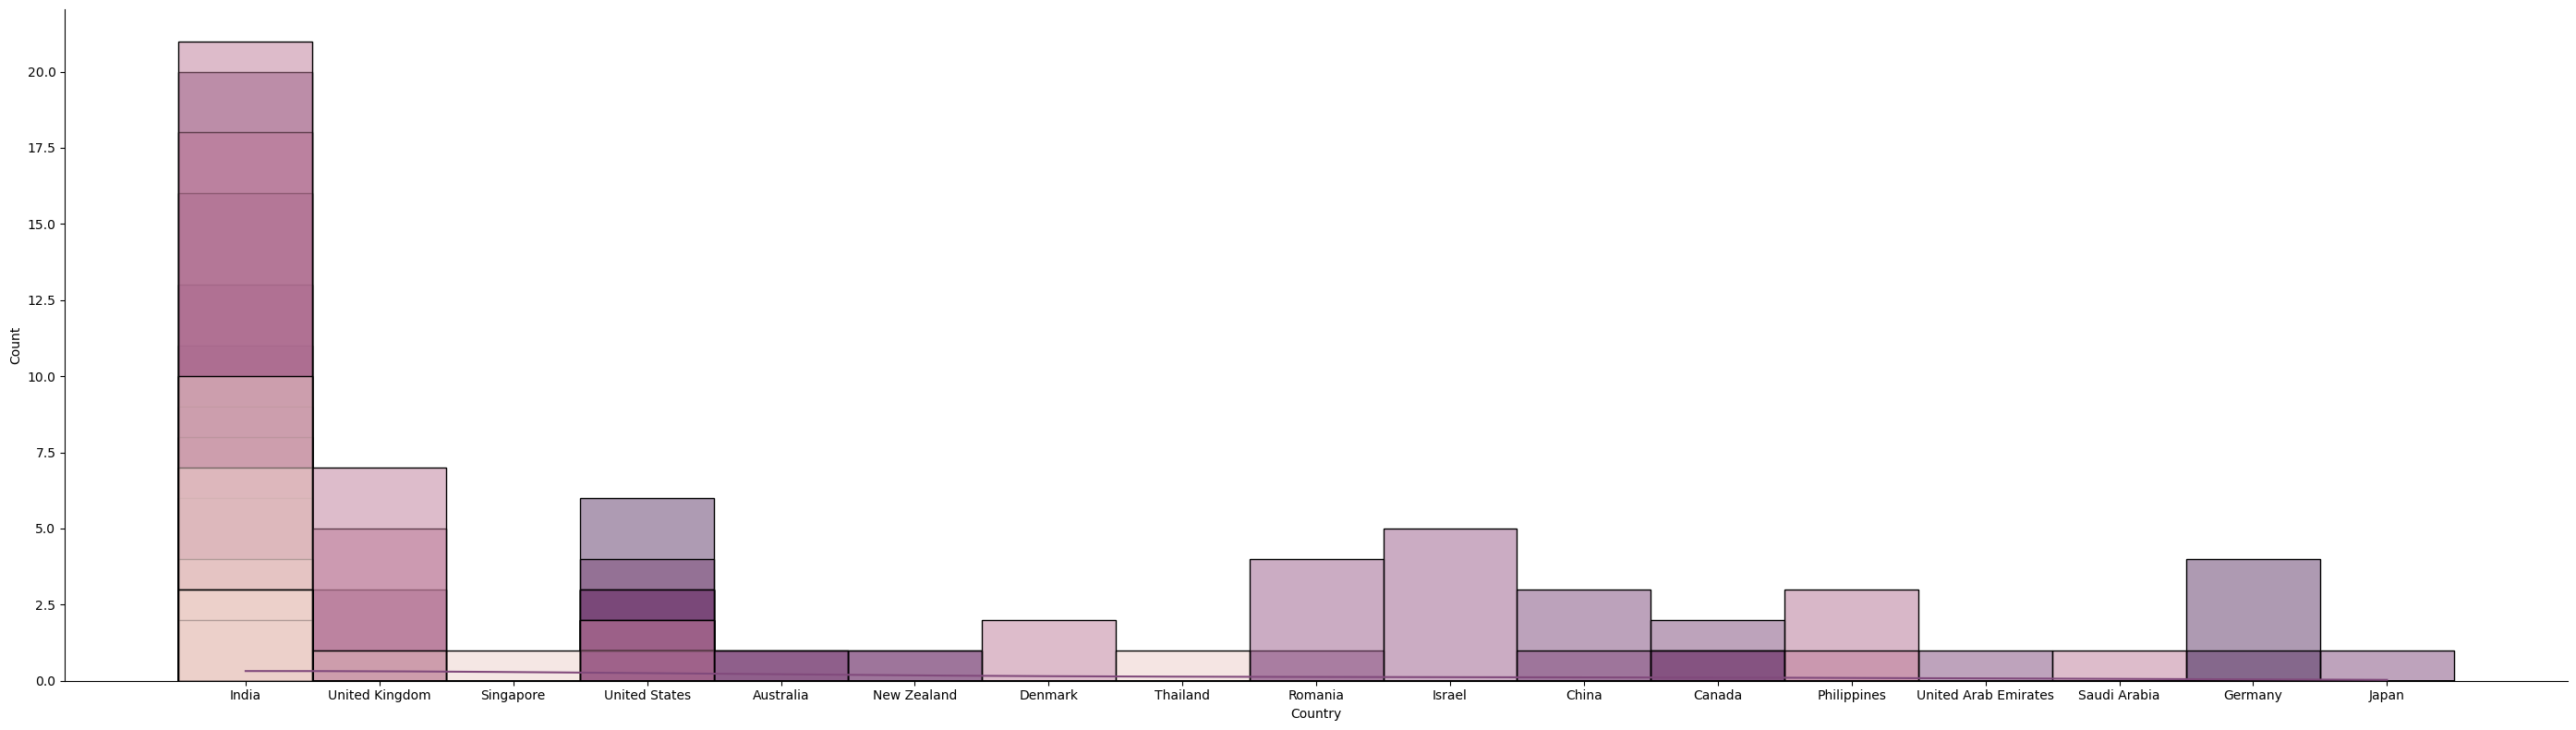

In [67]:
## Country wise Active User

df.groupby('Country')['Receiver_ID'].count().sort_values(ascending = False)

sns.displot(data=df, x='Country', hue='Receiver_ID',kde = True,legend = False,height=8, aspect=3.5)

In [8]:
## Those who received Awards

d = df[df['Feed_Type'] == "Award"]

In [9]:
d

,Sender_ID,Company_Names,Receiver_ID,Country,Points,Date,Month,Week_Num,Feed_Type,Manager_ID
0,1448843,E,1449672,India,5000,2022-10-17,10,43,Award,1448843
1,1448843,E,1452428,United Kingdom,18000,2022-10-17,10,43,Award,1448843
2,1448843,E,1441662,Singapore,40000,2022-10-17,10,43,Award,1448843
3,1440855,E,1440851,India,15000,2022-12-22,12,52,Award,No Result
4,1440855,E,1453627,India,15000,2022-12-22,12,52,Award,No Result
...,...,...,...,...,...,...,...,...,...,...
3085,1624318,K,1712164,India,500,2022-12-27,12,53,Award,No Result
3087,2002683,YYA,2002680,India,1000,2022-12-29,12,53,Award,2002683
3088,2002683,YYA,2002682,India,2500,2022-12-29,12,53,Award,2002683
3089,2002683,YYA,2002680,India,2500,2022-12-29,12,53,Award,2002683


<AxesSubplot:title={'center':'Count Of Feed Type'}, xlabel='Feed_Type', ylabel='count'>

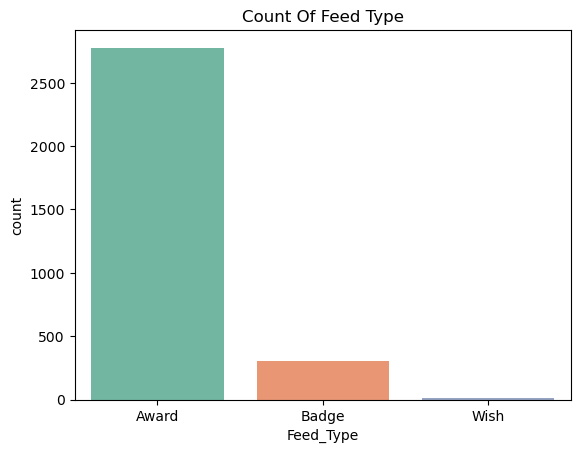

In [68]:
plt.title("Count Of Feed Type")

sns.countplot(x = 'Feed_Type',data = df,palette ='Set2')

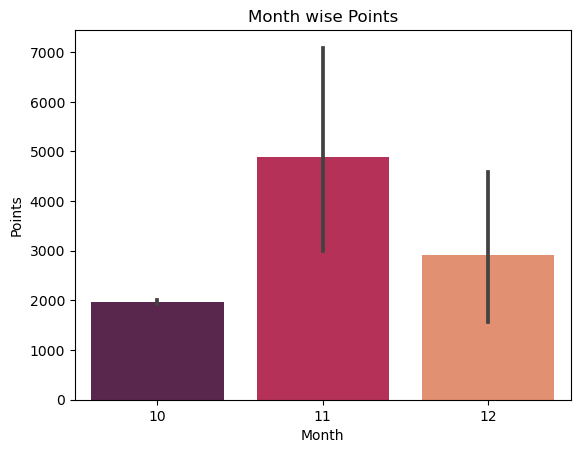

In [64]:
df.groupby('Month')['Points'].sum()

result = sns.barplot(df['Month'],df['Points'],palette = 'rocket')
plt.title('Month wise Points')
plt.xlabel('Month')
plt.ylabel('Points')
plt.show()

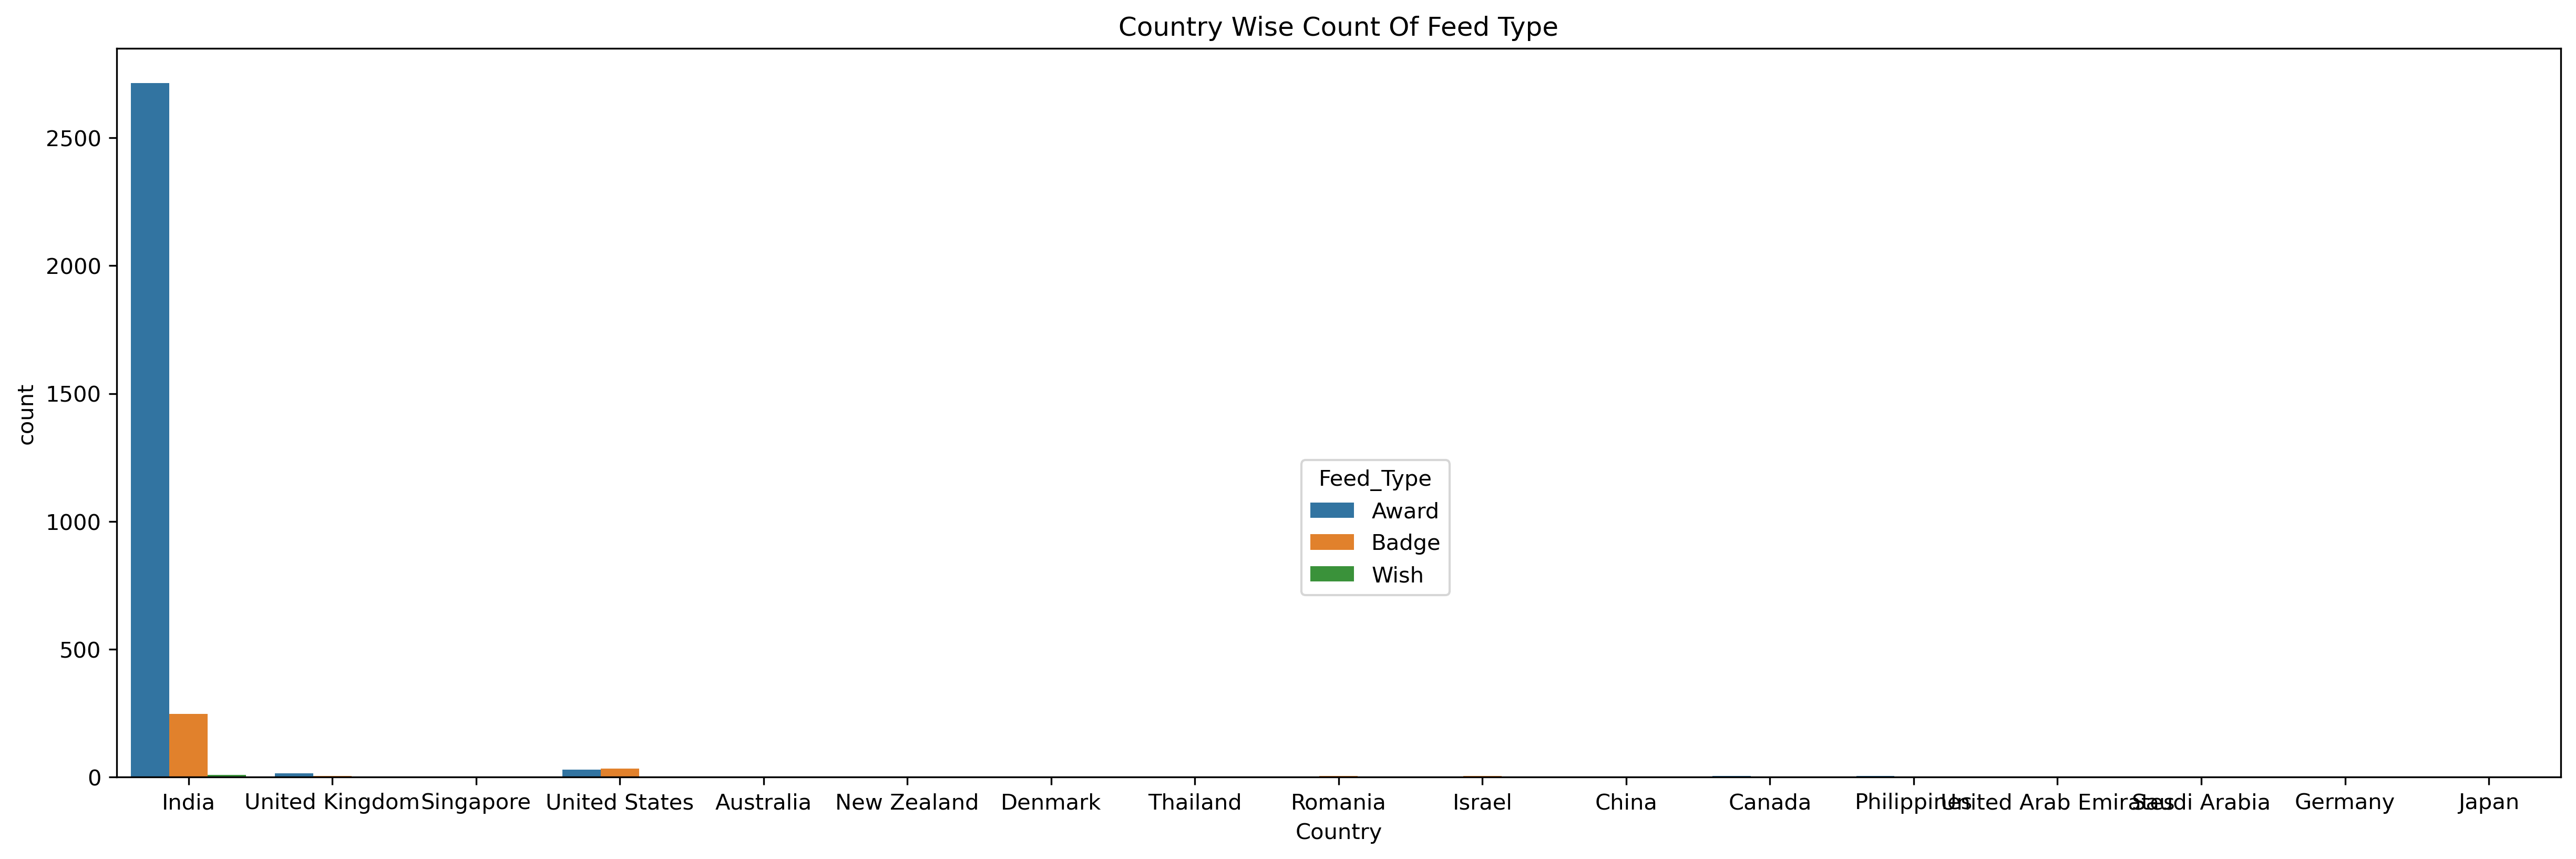

In [65]:
## Country Wise Feed Type

df.groupby('Country')['Feed_Type'].value_counts()
fig = plt.figure(figsize = (20,6),dpi = 300)
plt.title("Country Wise Count Of Feed Type")
g = sns.countplot(x ='Country',hue='Feed_Type',data = df)
sns.move_legend(g, "upper right", bbox_to_anchor=(.55, .45))


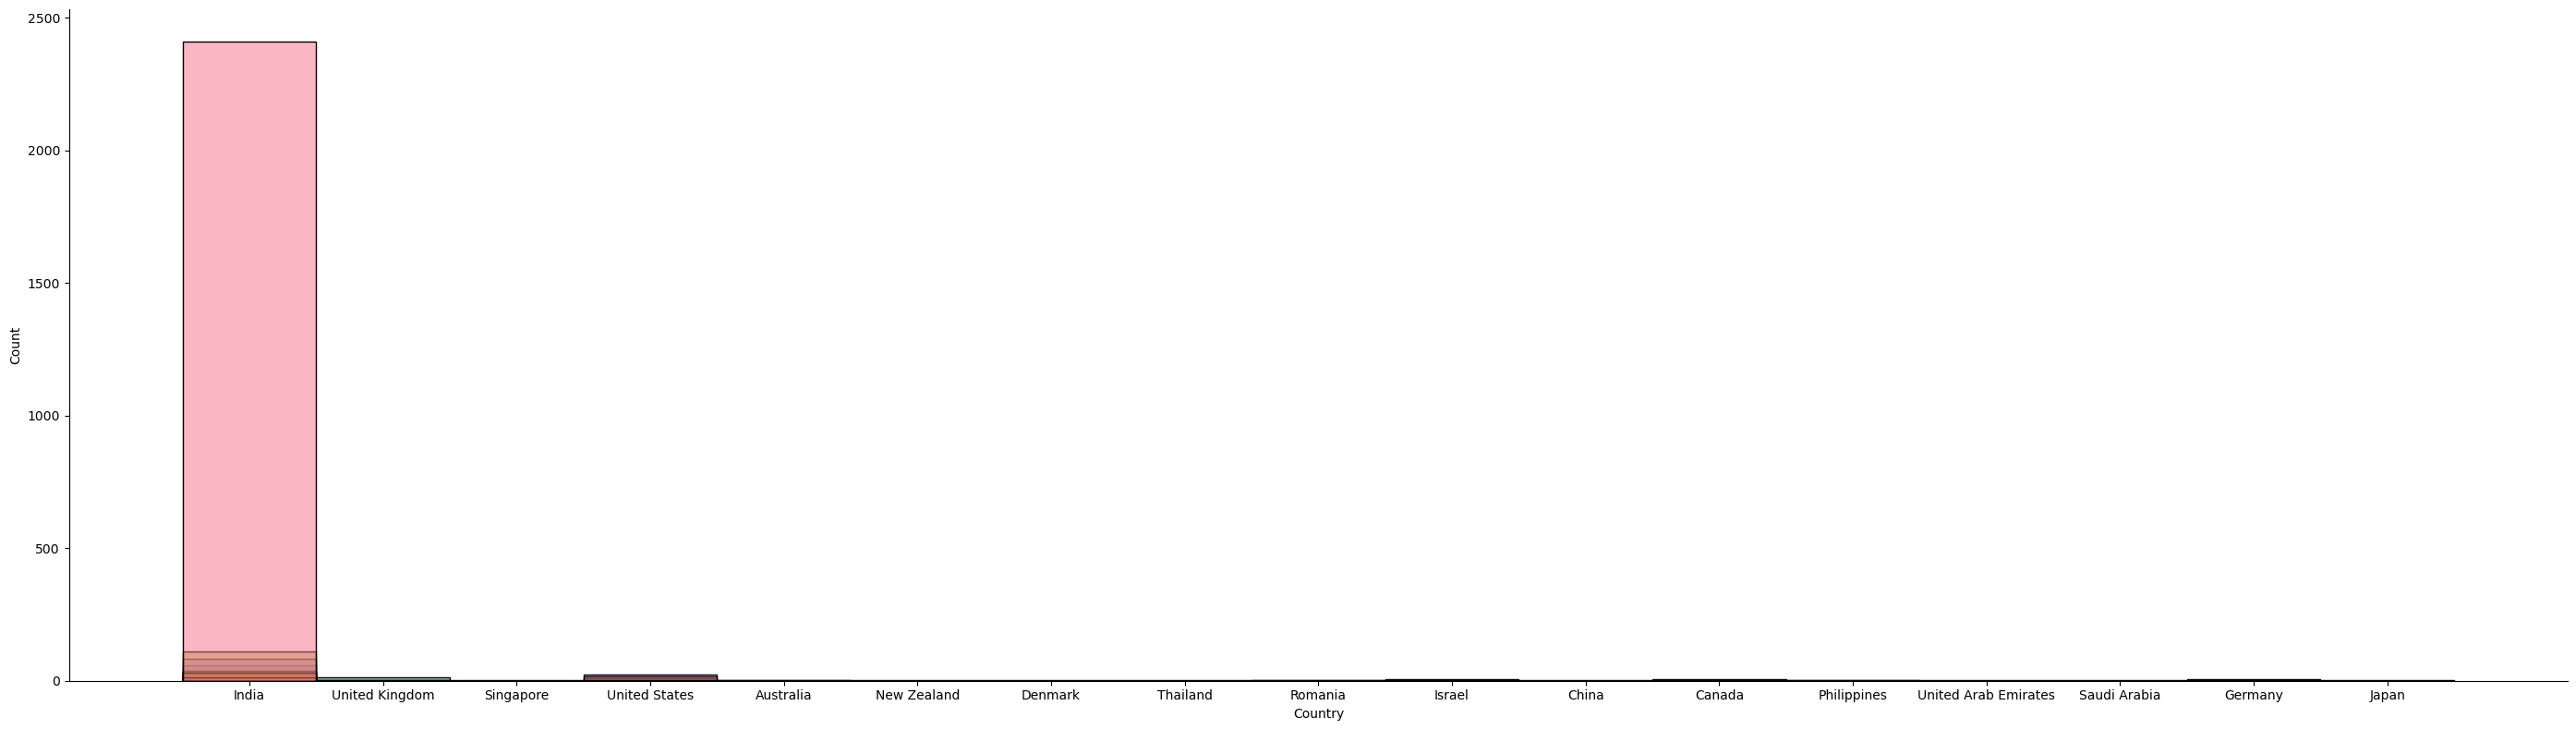

In [66]:
## Country wise Number of Company

df.groupby('Country')['Company_Names'].count().sort_values(ascending = False)

sns.displot(data=df, x='Country', hue='Company_Names',legend = False,height=8, aspect=3.5)

In [12]:
## Receiver ID wise Week Number Vs Points 


df.groupby('Receiver_ID')['Week_Num','Points'].mean().sort_values('Week_Num',ascending = False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27716\717062771.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Receiver_ID')['Week_Num','Points'].mean().sort_values('Week_Num',ascending = False)


,Week_Num,Points
Receiver_ID,,
2002682,53.00,1750.0
1697011,53.00,2000.0
1819549,53.00,0.0
1712164,53.00,500.0
1712155,53.00,500.0
...,...,...
1824737,41.00,8000.0
1828357,41.00,0.0
1828119,40.75,1875.0


In [13]:
## Manager ID wise Week Number Vs Points 


df.groupby('Manager_ID')['Week_Num','Points'].mean().sort_values('Week_Num',ascending = False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27716\303568280.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Manager_ID')['Week_Num','Points'].mean().sort_values('Week_Num',ascending = False)


,Week_Num,Points
Manager_ID,,
1697010,53.000000,2000.000000
2002686,53.000000,1000.000000
2002683,53.000000,2000.000000
1780652,53.000000,0.000000
1774421,53.000000,0.000000
...,...,...
1822550,41.000000,0.000000
1824693,41.000000,5000.000000
1825603,41.000000,5000.000000


In [14]:
## Manager ID wise Month Vs Points 


df.groupby('Manager_ID')['Month','Points'].mean().sort_values('Month',ascending = False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27716\24003962.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Manager_ID')['Month','Points'].mean().sort_values('Month',ascending = False)


,Month,Points
Manager_ID,,
1819522,12.0,0.0
1839014,12.0,1300.0
1774421,12.0,0.0
1780334,12.0,500.0
1892044,12.0,0.0
...,...,...
1440967,10.0,2750.0
1828679,10.0,0.0
1828704,10.0,300.0


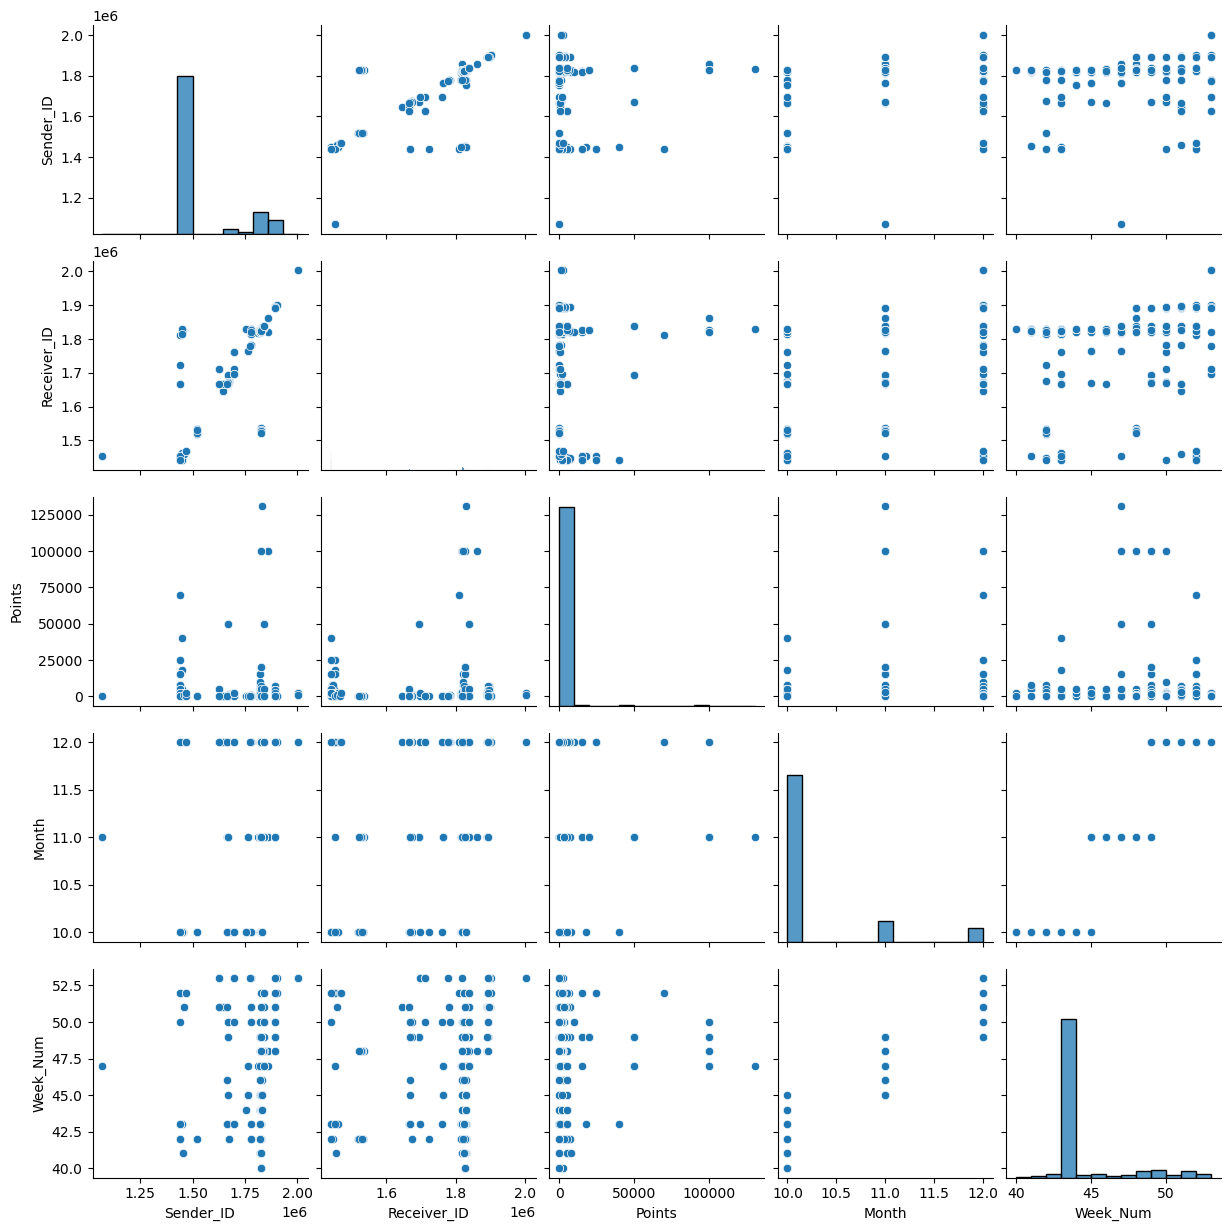

In [75]:

sns.pairplot(df)